<a href="https://colab.research.google.com/github/cole-beach/Hotel-Booking-Demand/blob/main/Hotel_Booking_Demand.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [75]:
!pip install sort-dataframeby-monthorweek

!pip install sorted-months-weekdays

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Hotel Booking Demand

This dataset can be found on [DataCamp Workspace](https://app.datacamp.com/workspace/datasets/dataset-python-hotel-booking-demand).

This dataset consists of booking data from a city hotel and a resort hotel. It includes many details about the bookings, including room specifications, the length of stay, the time between the booking and the stay, whether the booking was canceled, and how the booking was made. The data was gathered between July 2015 and August 2017.

## Data Dictionary
_Note: For binary variables: `1` = true and `0` = false._


| Column                                                                                                                                                                                                          | Explanation                                                                                                                            |   |   |   |
|-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|----------------------------------------------------------------------------------------------------------------------------------------|---|---|---|
| is_canceled                                                                                                                                                                                                     | Binary variable indicating whether a booking was canceled                                                                              |   |   |   |
| lead_time                                                                                                                                                                                                       | Number of days between booking date and arrival date                                                                                   |   |   |   |
| arrival_date_week_number, arrival_date_day_of_month, arrival_date_month                                                                                                                                         | Week number, day date, and month number of arrival date                                                                                |   |   |   |
| stays_in_weekend_nights, stays_in_week_nights                                                                                                                                                                   | Number of weekend nights (Saturday and Sunday) and weeknights (Monday to Friday) the customer booked                                   |   |   |   |
| adults, children, babies                                                                                                                                                                                        | Number of adults, children, babies booked for the stay                                                                                 |   |   |   |
| is_repeated_guest                                                                                                                                                                                               | Binary variable indicating whether the customer was a repeat guest                                                                     |   |   |   |
| previous_cancellations                                                                                                                                                                                          | Number of prior bookings that were canceled by the customer                                                                            |   |   |   |
| previous_bookings_not_canceled                                                                                                                                                                                  | Number of prior bookings that were not canceled by the customer                                                                        |   |   |   |
| required_car_parking_spaces                                                                                                                                                                                     | Number of parking spaces requested by the customer                                                                                     |   |   |   |
| total_of_special_requests                                                                                                                                                                                       | Number of special requests made by the customer                                                                                        |   |   |   |
| avg_daily_rate                                                                                                                                                                                                  | Average daily rate, as defined by dividing the sum of all lodging transactions by the total number of staying nights                   |   |   |   |
| booked_by_company                                                                                                                                                                                               | Binary variable indicating whether a company booked the booking                                                                        |   |   |   |
| booked_by_agent                                                                                                                                                                                                 | Binary variable indicating whether an agent booked the booking                                                                         |   |   |   |
| hotel_City                                                                                                                                                                                                      | Binary variable indicating whether the booked hotel is a "City Hotel"                                                                  |   |   |   |
| hotel_Resort                                                                                                                                                                                                    | Binary variable indicating whether the booked hotel is a "Resort Hotel"                                                                |   |   |   |
| meal_BB                                                                                                                                                                                                         | Binary variable indicating whether a bed & breakfast meal was booked                                                                   |   |   |   |
| meal_HB                                                                                                                                                                                                         | Binary variable indicating whether a half board meal was booked                                                                        |   |   |   |
| meal_FB                                                                                                                                                                                                         | Binary variable indicating whether a full board meal was booked                                                                        |   |   |   |
| meal_No_meal                                                                                                                                                                                                    | Binary variable indicating whether there was no meal package booked                                                                    |   |   |   |
| market_segment_Aviation, market_segment_Complementary, market_segment_Corporate, market_segment_Direct, market_segment_Groups, market_segment_Offline_TA_TO, market_segment_Online_TA, market_segment_Undefined | Indicates market segment designation with a value of 1. "TA"= travel agent, "TO"= tour operators                                       |   |   |   |
| distribution_channel_Corporate, distribution_channel_Direct, distribution_channel_GDS, distribution_channel_TA_TO, distribution_channel_Undefined                                                               | Indicates booking distribution channel with a value of 1. "TA"= travel agent, "TO"= tour operators, "GDS" = Global Distribution System |   |   |   |
| reserved_room_type_A, reserved_room_type_B, reserved_room_type_C, reserved_room_type_D, reserved_room_type_E, reserved_room_type_F, reserved_room_type_G, reserved_room_type_H, reserved_room_type_L            | Indicates code of room type reserved with a value of 1. Code is presented instead of designation for anonymity reasons                 |   |   |   |
| deposit_type_No_Deposit                                                                                                                                                                                         | Binary variable indicating whether a deposit was made                                                                                  |   |   |   |
| deposit_type_Non_Refund                                                                                                                                                                                         | Binary variable indicating whether a deposit was made in the value of the total stay cost                                              |   |   |   |
| deposit_type_Refundable                                                                                                                                                                                         | Binary variable indicating whether a deposit was made with a value under the total stay cost                                           |   |   |   |
| customer_type_Contract                                                                                                                                                                                          | Binary variable indicating whether the booking has an allotment or other type of contract associated to it                             |   |   |   |
| customer_type_Group                                                                                                                                                                                             | Binary variable indicating whether the booking is associated to a group                                                                |   |   |   |
| customer_type_Transient                                                                                                                                                                                         | Binary variable indicating whether the booking is not part of a group or contract, and is not associated to other transient booking    |   |   |   |
| customer_type_Transient-Party                                                                                                                                                                                   | Binary variable indicating whether the booking is transient, but is associated to at least another transient booking                   |   |   |   |

## Data Loading and Exploration

In [76]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [77]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
sns.set(style="whitegrid")

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import make_column_selector, make_column_transformer

# Models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier

import xgboost as xgb
from xgboost import XGBClassifier

from sklearn import set_config
set_config(display='diagram')

In [78]:
df = pd.read_csv('/content/drive/MyDrive/Coding Dojo: Data Science/Portfolio/Hotel Booking Demand/Data/hotel_bookings.csv')
pd.set_option('display.max_columns', None)
display(df.head())
print(df.info())

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,7/3/2015


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [79]:
print(f'There are {df.duplicated().sum()} duplicated values','\n')
print(f'The shape of the dataset is {df.shape}\n\n===========================================\n\n Missing Values:')
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head()

There are 31994 duplicated values 

The shape of the dataset is (119390, 32)


 Missing Values:


,Total,Percent
company,112593,0.943069
agent,16340,0.136862
country,488,0.004087
children,4,0.000034
reserved_room_type,0,0.000000


In [80]:
df.drop_duplicates(inplace=True)
print(f'After dropping duplicated values we have {df.duplicated().sum()} shown in the dataset','\n')

After dropping duplicated values we have 0 shown in the dataset 



In [81]:
# Replace missing values:
# agent: If no agency is given, booking was most likely made without one.
# company: If none given, it was most likely private.
nan_replacements = {"children:": 0.0,"country": "Unknown", "agent": 0, "company": 0}
df = df.fillna(nan_replacements)

In [82]:
df.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          4
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

In [83]:
df.dropna(inplace=True)

In [84]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
is_canceled,87392.0,0.274865,0.446449,0.00,0.0,0.0,1.0,1.0
lead_time,87392.0,79.894887,86.052720,0.00,11.0,49.0,125.0,737.0
arrival_date_year,87392.0,2016.210351,0.686069,2015.00,2016.0,2016.0,2017.0,2017.0
arrival_date_week_number,87392.0,26.838086,13.674835,1.00,16.0,27.0,37.0,53.0
arrival_date_day_of_month,87392.0,15.815967,8.835086,1.00,8.0,16.0,23.0,31.0
stays_in_weekend_nights,87392.0,1.005275,1.031928,0.00,0.0,1.0,2.0,19.0
stays_in_week_nights,87392.0,2.625412,2.053594,0.00,1.0,2.0,4.0,50.0
adults,87392.0,1.875778,0.626503,0.00,2.0,2.0,2.0,55.0
children,87392.0,0.138640,0.455881,0.00,0.0,0.0,0.0,10.0
babies,87392.0,0.010825,0.113599,0.00,0.0,0.0,0.0,10.0


In [85]:
df.shape

(87392, 32)

# Visualizations


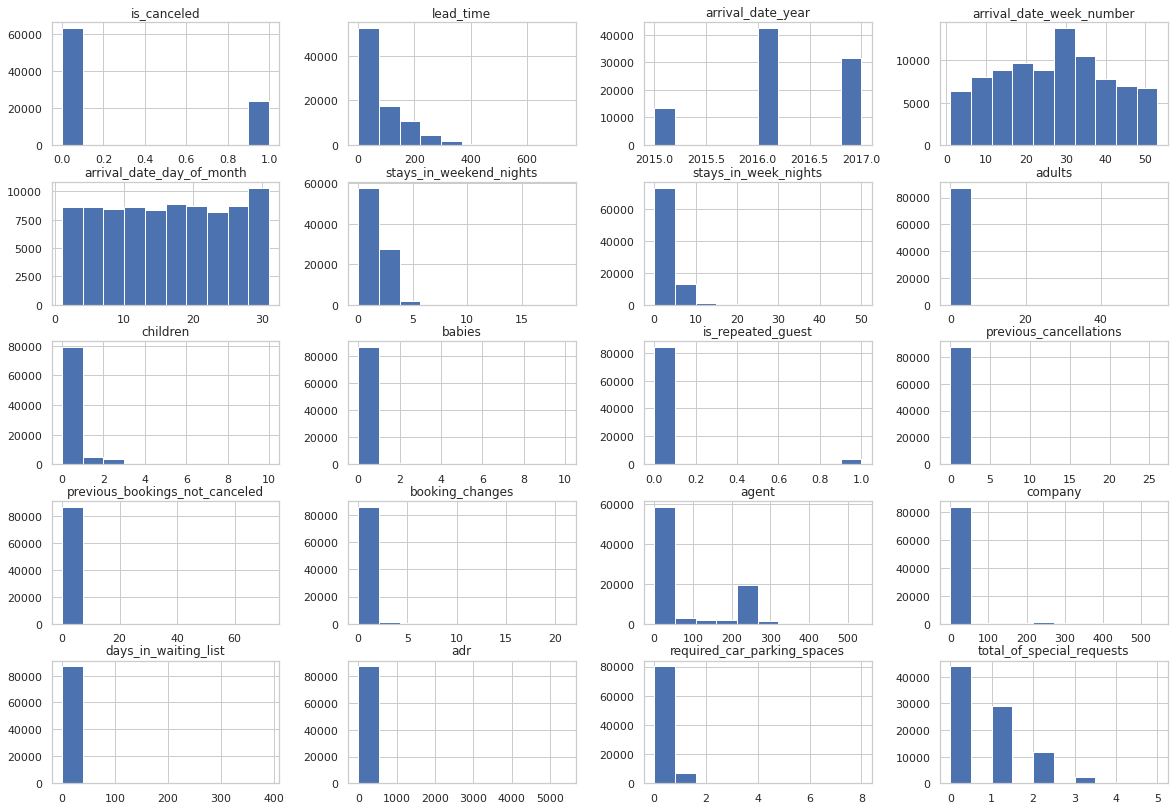

In [86]:
df.hist(figsize=(20,14))
plt.show()

In [87]:
# After cleaning, separate Resort and City hotel
# To know the acutal visitor numbers, only bookings that were not canceled are included. 
rh = df.loc[(df["hotel"] == "Resort Hotel") & (df["is_canceled"] == 0)]
ch = df.loc[(df["hotel"] == "City Hotel") & (df["is_canceled"] == 0)]

## Where are guests traveling from?

In [88]:
# get number of acutal guests by country
country_data = pd.DataFrame(df.loc[df["is_canceled"] == 0]["country"].value_counts())
#country_data.index.name = "country"
country_data.rename(columns={"country": "Number of Guests"}, inplace=True)
total_guests = country_data["Number of Guests"].sum()
country_data["Guests in %"] = round(country_data["Number of Guests"] / total_guests * 100, 2)
country_data["country"] = country_data.index
#country_data.loc[country_data["Guests in %"] < 2, "country"] = "Other"

# pie plot
fig = px.pie(country_data,
             values="Number of Guests",
             names="country",
             title="Home country of guests",
             template="seaborn")
fig.update_traces(textposition="inside", textinfo="value+percent+label")
fig.show()

In [89]:
# get number of acutal guests by country
country_data = pd.DataFrame(df.loc[df["is_canceled"] == 0]["country"].value_counts())
#country_data.index.name = "country"
country_data.rename(columns={"country": "Number of Guests"}, inplace=True)
total_guests = country_data["Number of Guests"].sum()
country_data["Guests in %"] = round(country_data["Number of Guests"] / total_guests * 100, 2)
country_data["country"] = country_data.index

# show on map
guest_map = px.choropleth(country_data,
                    locations=country_data.index,
                    color=country_data["Guests in %"], 
                    hover_name=country_data.index, 
                    color_continuous_scale=px.colors.sequential.Plasma,
                    title="Home country of guests")
guest_map.show()

The vast majority of travelers from this dataset are coming from Portugal followed what looks to be Great Britain, France, Spain, then Germany. 

## How are people traveling? 

In [90]:
labels = df['arrival_date_month']

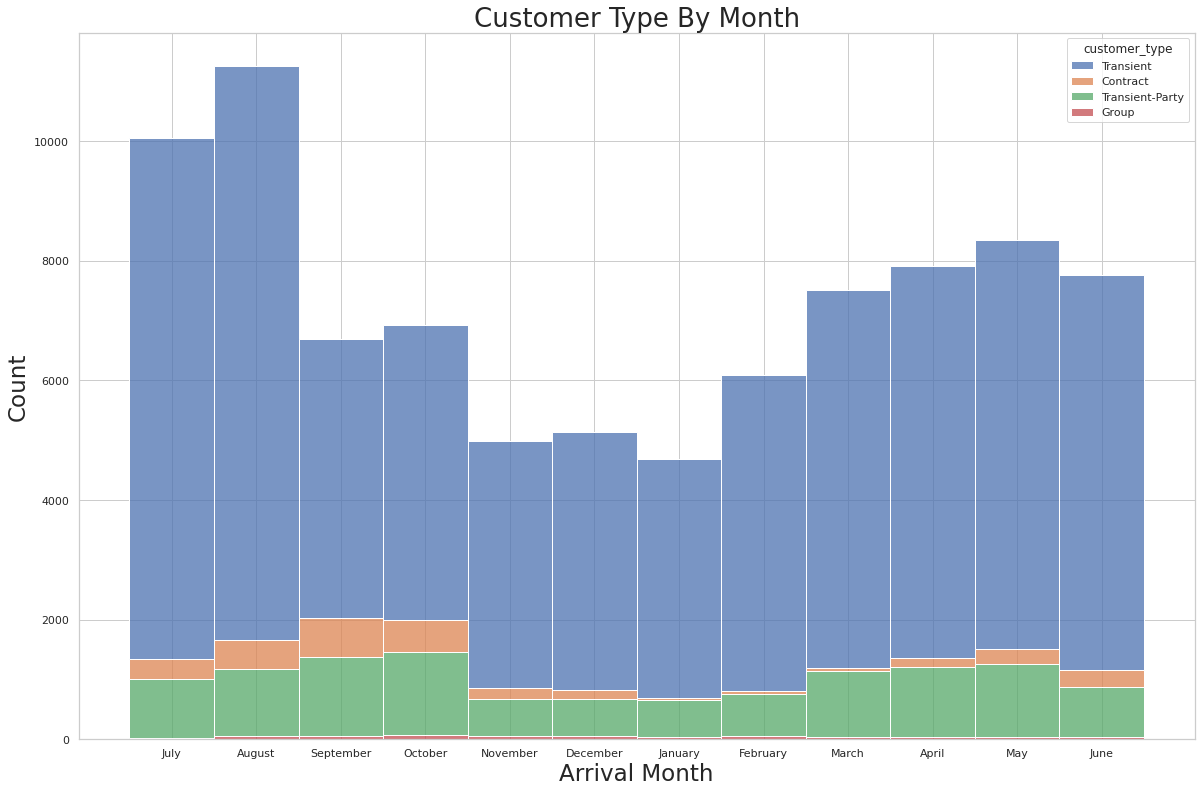

In [91]:
fig, ax = plt.subplots(figsize=(20,13))
sns.histplot(data=df, x="arrival_date_month", hue='customer_type', multiple="stack")
plt.title('Customer Type By Month', {'fontsize':26})
plt.xlabel('Arrival Month',{'fontsize':23})
plt.ylabel('Count',{'fontsize':23});

We can see from the bar chart above that most customers are traveling as transients where very little are traveling as a group. We can also see that August is the the highest travel month. 

## Who is creating the reservations?

In [141]:
# total bookings per market segment (incl. canceled)
segments = df["market_segment"].value_counts()

# pie plot
fig = px.pie(segments,
             values=segments.values,
             names=segments.index,
             title="Bookings per market segment",
             template="seaborn")
fig.update_traces(rotation=-90, textinfo="percent+label")
fig.show()

The piechart shows us that Travel Agents own majority of the reservations created by customers interested in traveling. 

## Resort and City hotels Exploration


### How much are guests paying? 

In [93]:
import sort_dataframeby_monthorweek as sd

def sort_month(df, column_name):
    return sd.Sort_Dataframeby_Month(df, column_name)

# Counting adults and children as paying guests only, not babies.
resort_hotel = rh.groupby(['arrival_date_month'])['adr'].mean().reset_index()
city_hotel= ch.groupby(['arrival_date_month'])['adr'].mean().reset_index()
rate_comparison = resort_hotel.merge(city_hotel, on = 'arrival_date_month')
rate_comparison.columns = ['month', 'price_for_resort', 'price_for_city_hotel']
sorted_rate_comparison = sort_month(rate_comparison, 'month')

In [94]:
print(sorted_rate_comparison)
plt.figure(figsize = (17, 8))

px.line(sorted_rate_comparison, x = 'month', y = ['price_for_resort','price_for_city_hotel'],
        title = 'Room price per night over the Months', template = 'plotly_dark')

        month  price_for_resort  price_for_city_hotel
0     January         48.542066             83.180097
1    February         53.624311             87.843338
2       March         57.083964             90.759820
3       April         76.841664            114.121066
4         May         77.725129            124.533785
5        June        108.970363            120.486062
6        July        150.914540            119.740148
7      August        182.103524            122.497179
8   September         98.855456            116.723183
9     October         62.578195            105.140685
10   November         48.928493             87.751507
11   December         63.977295             90.111067


<Figure size 1224x576 with 0 Axes>

August is the peak for Resorts charging the most. By my own assumptions this can be a result to the end of summer break and families wanting to get those last minute travel plans. You can also see that there's an incline mid to late November going into December. This is for those looking to travel during the holidays and if they are traveling throughout Europe they'll get a chance to explore some beautiful Christmas Markets.  

## Busiest Month For Hotel Type?

In [95]:
resort_guests = rh['arrival_date_month'].value_counts().reset_index()
resort_guests.columns=['month','no of guests']
city_guests = ch['arrival_date_month'].value_counts().reset_index()
city_guests.columns=['month','no of guests']

# merge
final_guests = resort_guests.merge(city_guests,on='month')
final_guests.columns=['month','# of guests in Resorts','# of guest in City Hotels']
final_guests = sort_month(final_guests,'month')
final_guests

,month,# of guests in Resorts,# of guest in City Hotels
0,January,1689,1966
1,February,2053,2630
2,March,2192,3491
3,April,2169,3330
4,May,2246,3667
5,June,1927,3484
6,July,3013,3846
7,August,3153,4481
8,September,1875,3173
9,October,2211,3081


In [96]:
px.line(final_guests, x = 'month', y = ['# of guests in Resorts','# of guest in City Hotels'],
        title='Total # of guests per Months', template = 'plotly_dark')

August not only is the peak for charging the most, it's also the peak for travel, which a major decline in September but slight spike in October which does have me curious. The spikes in March to May are for those looking to travel during Spring time and there could be a possible increase in certain desinations, such as Keukenhof, Amsterdam, for the [Tuplip Festival](https://tulipfestivalamsterdam.com/keukenhof/). 

## How long are people staying?

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



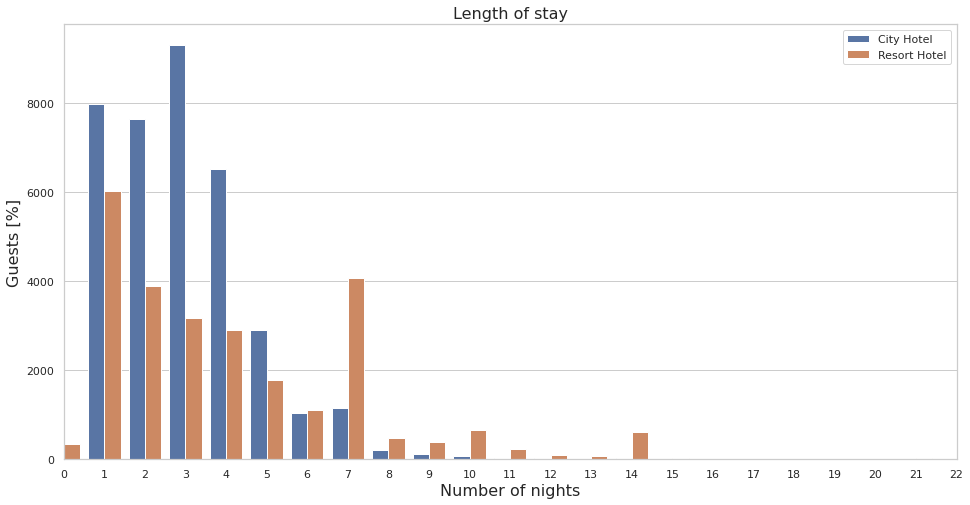

In [97]:
filter = df['is_canceled'] == 0
data = df[filter]
data.head()

data['total_nights'] = data['stays_in_weekend_nights'] + data['stays_in_week_nights']
data.head()

len_stay = data.groupby(['total_nights', 'hotel']).agg('count').reset_index()
len_stay = len_stay.iloc[:, :3]
len_stay = len_stay.rename(columns={'is_canceled':'Number of stays'})

plt.figure(figsize=(16, 8))
sns.barplot(x ="total_nights", y = "Number of stays", hue="hotel", data=len_stay)
plt.title("Length of stay", fontsize=16)
plt.xlabel("Number of nights", fontsize=16)
plt.ylabel("Guests [%]", fontsize=16)
plt.legend(loc="upper right")
plt.xlim(0,22)
plt.show()

For the Resorts people tend to go big with 7-night or do just one night. There's a clear drop off after 7-nights which could possibly indicate a corrillation of people getting certain amount of time off to travel. 

City hotels have a great flux from just 1-night to 4-nights. The high number in 1-night stays could be brief staycations, where the 3-night stays could be a number of different factors. 

## How Many Booking Have Been Cancelled?


In [98]:
# absolute cancelations:
total_cxls = df["is_canceled"].sum()
resort_cxls = df.loc[df["hotel"] == "Resort Hotel"]["is_canceled"].sum()
city_cxls = df.loc[df["hotel"] == "City Hotel"]["is_canceled"].sum()

# as percent:
rel_cancel = total_cxls / df.shape[0] * 100
rh_rel_cancel = resort_cxls / df.loc[df["hotel"] == "Resort Hotel"].shape[0] * 100
ch_rel_cancel = city_cxls / df.loc[df["hotel"] == "City Hotel"].shape[0] * 100

print(f"Total bookings canceled: {total_cxls:,} ({rel_cancel:.0f}%)")
print(f"Resort hotel bookings canceled: {resort_cxls:,} ({rh_rel_cancel:.0f}%)")
print(f"City hotel bookings canceled: {city_cxls:,} ({ch_rel_cancel:.0f}%)")

Total bookings canceled: 24,021 (27%)
Resort hotel bookings canceled: 7,976 (23%)
City hotel bookings canceled: 16,045 (30%)


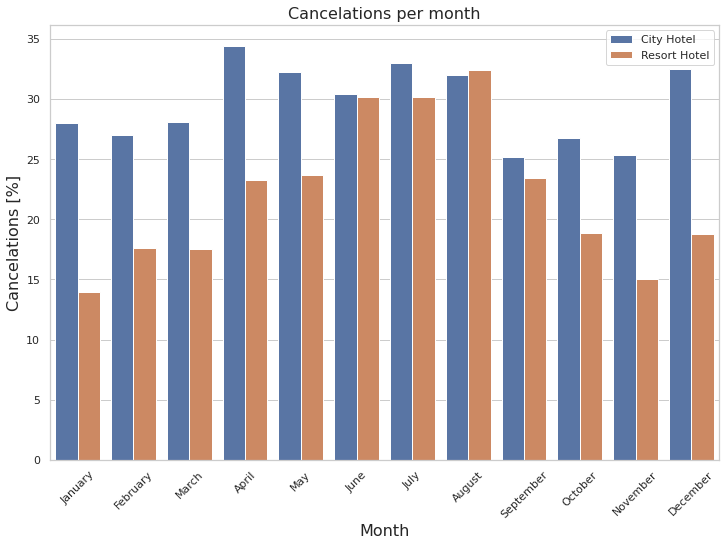

In [99]:
# Create a DateFrame with the relevant data:
res_book_per_month = df.loc[(df["hotel"] == "Resort Hotel")].groupby("arrival_date_month")["hotel"].count()
res_cxl_per_month = df.loc[(df["hotel"] == "Resort Hotel")].groupby("arrival_date_month")["is_canceled"].sum()

city_book_per_month = df.loc[(df["hotel"] == "City Hotel")].groupby("arrival_date_month")["hotel"].count()
city_cxl_per_month = df.loc[(df["hotel"] == "City Hotel")].groupby("arrival_date_month")["is_canceled"].sum()

res_cxl_data = pd.DataFrame({"Hotel": "Resort Hotel",
                                "Month": list(res_book_per_month.index),
                                "Bookings": list(res_book_per_month.values),
                                "Cancelations": list(res_cxl_per_month.values)})
city_cxl_data = pd.DataFrame({"Hotel": "City Hotel",
                                "Month": list(city_book_per_month.index),
                                "Bookings": list(city_book_per_month.values),
                                "Cancelations": list(city_cxl_per_month.values)})

cxl_data = pd.concat([res_cxl_data, city_cxl_data], ignore_index=True)
cxl_data["cancel_percent"] = cxl_data["Cancelations"] / cxl_data["Bookings"] * 100

# order by month:
ordered_months = ["January", "February", "March", "April", "May", "June", 
          "July", "August", "September", "October", "November", "December"]
cxl_data["Month"] = pd.Categorical(cxl_data["Month"], categories=ordered_months, ordered=True)

# show figure:
plt.figure(figsize=(12, 8))
sns.barplot(x = "Month", y = "cancel_percent" , hue="Hotel",
            hue_order = ["City Hotel", "Resort Hotel"], data=cxl_data)
plt.title("Cancelations per month", fontsize=16)
plt.xlabel("Month", fontsize=16)
plt.xticks(rotation=45)
plt.ylabel("Cancelations [%]", fontsize=16)
plt.legend(loc="upper right")
plt.show()

April is the highest month for City Hotel Cancellations whereas August has a higher cancellation rate with the Resorts. 

## Correlation Data

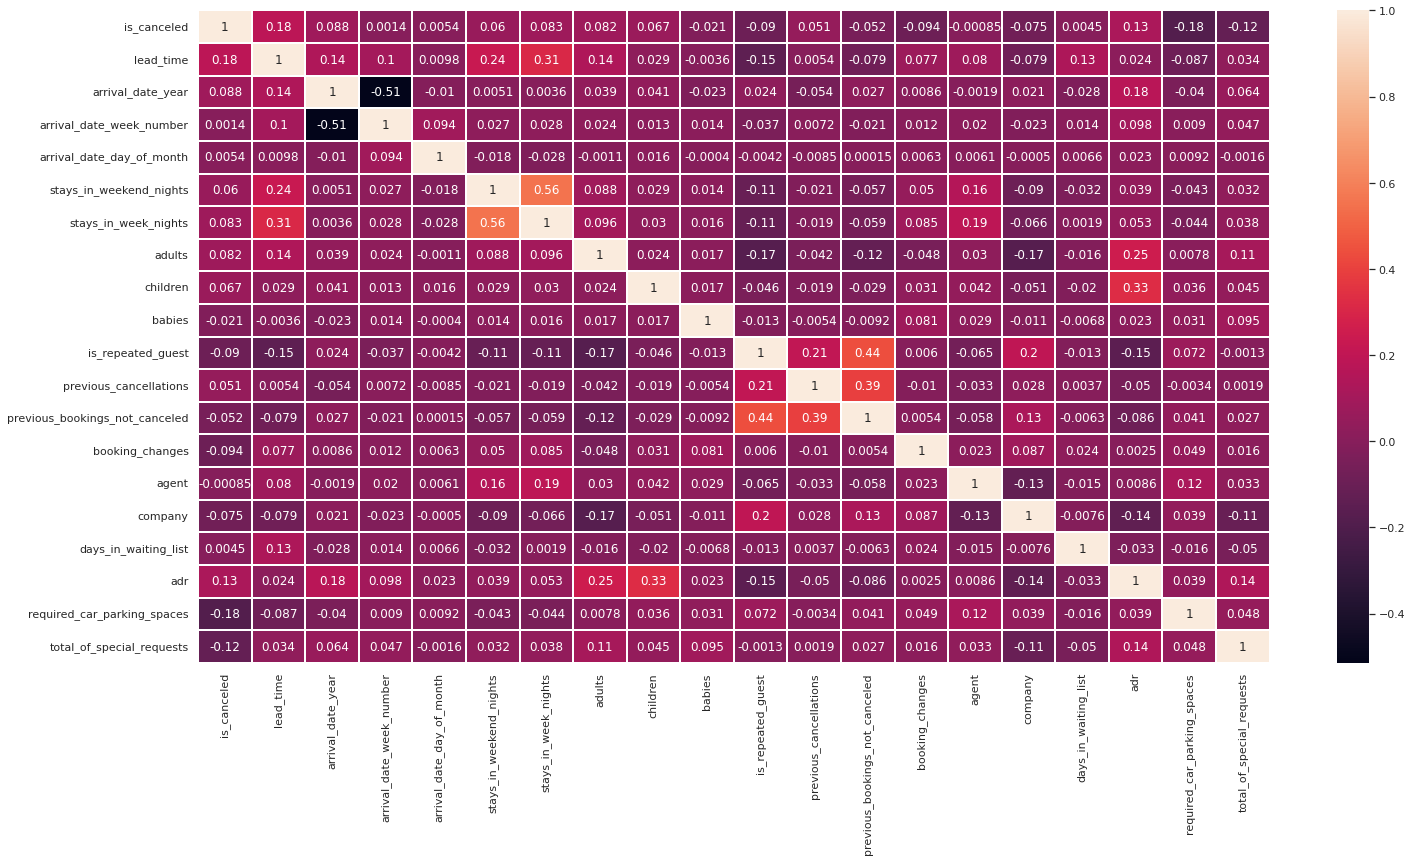

In [100]:
plt.figure(figsize = (24, 12))

corr = df.corr()
sns.heatmap(corr, annot = True, linewidths = 1)
plt.show()

In [101]:
correlation = df.corr()['is_canceled'].abs().sort_values(ascending = False)
correlation

is_canceled                       1.000000
lead_time                         0.184887
required_car_parking_spaces       0.184196
adr                               0.128103
total_of_special_requests         0.120604
booking_changes                   0.093622
is_repeated_guest                 0.089633
arrival_date_year                 0.088173
stays_in_week_nights              0.082948
adults                            0.081778
company                           0.074747
children                          0.067396
stays_in_weekend_nights           0.060214
previous_bookings_not_canceled    0.052149
previous_cancellations            0.051477
babies                            0.020537
arrival_date_day_of_month         0.005406
days_in_waiting_list              0.004470
arrival_date_week_number          0.001414
agent                             0.000850
Name: is_canceled, dtype: float64

From the corrilation list it is apparent that the features, lead_time, required_car_parking_spaces, adr, total_of_special_requests, and booking_changes, are the 5 most import reasons for people cancelling. 

I'm going to check on the number of bookings changed since there could be a source of leakage with this kind of data changing over time.

In [102]:
df.groupby("is_canceled")["reservation_status"].value_counts()

is_canceled  reservation_status
0            Check-Out             63371
1            Canceled              23007
             No-Show                1014
Name: reservation_status, dtype: int64

We can consider the "No-shows" to be a cancellation. 

In [103]:
no_show = df.replace({"No-Show":"Canceled"}, inplace=True)
df['reservation_status'].value_counts()

Check-Out    63371
Canceled     24021
Name: reservation_status, dtype: int64

# Models


## Preparing data to model

### Testing Area

## Feature Engineering Datetime

In [104]:
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])
df['year'] = df['reservation_status_date'].dt.year
df['month'] = df['reservation_status_date'].dt.month
df['day'] = df['reservation_status_date'].dt.day

In [105]:
# df.drop(['reservation_status_date','arrival_date_month'], axis=1 ,inplace = True)

## Pre-Processing

In [106]:
# hotel_cancelation_model = df.drop(['is_canceled'], axis=1)

In [129]:
y_model = df['is_canceled']
X_model = df.drop(columns=('is_canceled'))

In [130]:
X_train, X_test, y_train, y_test = train_test_split(X_model, y_model, test_size=0.3, random_state=42, stratify = y)

In [109]:
# With out pipeline

# # Selectors
# cat_selector = make_column_selector(dtype_include='object')
# num_selector = make_column_selector(dtype_include='number')

# # transformers
# scaler = StandardScaler()
# ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')

# # column transformer
# preprocessor = make_column_transformer((ohe, cat_selector), (scaler, num_selector))
 
# # process the data
# preprocessor.fit(X_train, y_train)
# X_train_proc = preprocessor.transform(X_train)
# X_test_proc = preprocessor.transform(X_test)
 
# X_train_proc.shape

In [131]:
# With pipeline
# Selectors
cat_selector = make_column_selector(dtype_include='object')
num_selector = make_column_selector(dtype_include='number')

# Scaler
scaler = StandardScaler()
# One-hot encoder
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)

# Numeric pipeline
numeric_pipe = make_pipeline(scaler)
# Categorical pipeline
categorical_pipe = make_pipeline(ohe)

# Tuples for Column Transformer
number_tuple = (numeric_pipe, num_selector)
category_tuple = (categorical_pipe, cat_selector)
# ColumnTransformer
preprocessor = make_column_transformer(number_tuple, category_tuple)
# fit on train
X_train_proc = preprocessor.fit_transform(X_train)
X_test_proc = preprocessor.transform(X_test)

## Functions


In [132]:
# Heatmap Function
from seaborn import heatmap
def eval_classification(model, X_train_proc, X_test_proc, y_train, y_test):
  print('Train Report:', classification_report(y_train, model.predict(X_train_proc)))
  print('Test Report:', classification_report(y_test, model.predict(X_test_proc)))

  cm = confusion_matrix(y_test, model.predict(X_test_proc))

  plt.figure(figsize=(15, 15))
  heatmap(cm, annot=True)
  plt.xlabel('Predicted', fontsize=40)
  plt.ylabel('True', fontsize=40)
  plt.show()

## Decision Tree

In [133]:
dtc_model = DecisionTreeClassifier(criterion= 'gini', min_samples_split=8,
                                  min_samples_leaf = 4, max_features = 'auto')
# fit the model
dtc_model.fit(X_train_proc, y_train)

#Predict Model
predict_dtc = dtc_model.predict(X_test_proc)

## Extra Treees Classsifier Model Building

In [134]:
etc_model = ExtraTreesClassifier(min_samples_leaf = 7, min_samples_split=2,
                                  n_estimators = 100)
# fit the model
etc_model.fit(X_train_proc, y_train)

#Predict Model
predict_etc = etc_model.predict(X_test_proc)

## Random Forest Model Building

In [135]:
rf_model = RandomForestClassifier(min_samples_leaf = 6, min_samples_split=6,
                                  n_estimators = 100)

# fit the model
estimator= rf_model.fit(X_train_proc, y_train)
#Predict Model
predict_rf = rf_model.predict(X_test_proc)

## Extreme Gradient Boosting Model Building


In [136]:
xgb_model = XGBClassifier(criterion = 'giny', learning_rate = 0.01, max_depth = 5, n_estimators = 100,
                          objective ='binary:logistic', subsample = 1.0)
# fit the model
xgb_model.fit(X_train_proc, y_train)
#Predict Model
predict_xgb = xgb_model.predict(X_test_proc)

## Classification Reports 



In [138]:
print("Random Forest Model Building:\n\n", classification_report(y_test, predict_rf))
print("Extra Treees Classsifier Model Building:\n\n", classification_report(y_test, predict_etc))
print("Decision Tree:\n\n",classification_report(y_test, predict_dtc))
print("XGB", classification_report(y_test, predict_xgb))

Random Forest Model Building:

               precision    recall  f1-score   support

           0       1.00      1.00      1.00     19012
           1       1.00      1.00      1.00      7206

    accuracy                           1.00     26218
   macro avg       1.00      1.00      1.00     26218
weighted avg       1.00      1.00      1.00     26218

Extra Treees Classsifier Model Building:

               precision    recall  f1-score   support

           0       1.00      1.00      1.00     19012
           1       1.00      1.00      1.00      7206

    accuracy                           1.00     26218
   macro avg       1.00      1.00      1.00     26218
weighted avg       1.00      1.00      1.00     26218

Decision Tree:

               precision    recall  f1-score   support

           0       0.96      0.98      0.97     19012
           1       0.93      0.88      0.91      7206

    accuracy                           0.95     26218
   macro avg       0.95      0.93   